Connected to molanalysis (Python 3.8.16)

In [ ]:
labeled     = ['unl','lab']

In [ ]:
import os

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import svm as SVM
# from sklearn.metrics import accuracy_score, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score
from scipy.signal import medfilt
from scipy.stats import zscore

from loaddata.session_info import filter_sessions,load_sessions
from loaddata.get_data_folder import get_local_drive
import seaborn as sns
import matplotlib.pyplot as plt
from utils.psth import *
from utils.plotting_style import * #get all the fixed color schemes
from utils.behaviorlib import * # get support functions for beh analysis 
from detection.plot_neural_activity_lib import *
from detection.example_cells import get_example_cells
from utils.regress_lib import *

plt.rcParams['svg.fonttype'] = 'none'

savedir = os.path.join(get_local_drive(),'OneDrive\\PostDoc\\Figures\\Detection\\Encoding\\')

ModuleNotFoundError: No module named 'loaddata'

In [ ]:
import os
os.chdir('c:\\Python\\molanalysis\\')
import numpy as np
import pandas as pd
from tqdm import tqdm

import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import svm as SVM
# from sklearn.metrics import accuracy_score, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score
from scipy.signal import medfilt
from scipy.stats import zscore

from loaddata.session_info import filter_sessions,load_sessions
from loaddata.get_data_folder import get_local_drive
import seaborn as sns
import matplotlib.pyplot as plt
from utils.psth import *
from utils.plotting_style import * #get all the fixed color schemes
from utils.behaviorlib import * # get support functions for beh analysis 
from detection.plot_neural_activity_lib import *
from detection.example_cells import get_example_cells
from utils.regress_lib import *

plt.rcParams['svg.fonttype'] = 'none'

savedir = os.path.join(get_local_drive(),'OneDrive\\PostDoc\\Figures\\Detection\\Encoding\\')

In [ ]:
protocol            = 'DN'
calciumversion      = 'deconv'

# session_list = np.array([['LPE12385', '2024_06_15']])
# session_list = np.array([['LPE12385', '2024_06_16']])
session_list = np.array([['LPE11622', '2024_02_21']])
# session_list = np.array([['LPE12385', '2024_06_16']])
session_list = np.array([['LPE11997', '2024_04_16'],
                         ['LPE11622', '2024_02_21'],
                         ['LPE11998', '2024_04_30'],
                         ['LPE12013','2024_04_25']])
# session_list = np.array([['LPE10884', '2023_12_14']])
# session_list = np.array([['LPE10884', '2023_12_14']])
# session_list        = np.array([['LPE12013','2024_04_25']])
# session_list        = np.array([['LPE12013','2024_04_26']])

# sessions,nSessions = load_sessions(protocol,session_list,load_behaviordata=True,load_videodata=False,
#                          load_calciumdata=True,calciumversion=calciumversion) #Load specified list of sessions

sessions,nSessions = filter_sessions(protocols=protocol,load_behaviordata=True,load_videodata=False,
                         load_calciumdata=True,calciumversion=calciumversion,min_cells=100) #Load specified list of sessions

In [ ]:
for i in range(nSessions):
    sessions[i].calciumdata = sessions[i].calciumdata.apply(zscore,axis=0)

In [ ]:
## Construct spatial tensor: 3D 'matrix' of K trials by N neurons by S spatial bins
## Parameters for spatial binning
s_pre       = -80  #pre cm
s_post      = 60   #post cm
binsize     = 10     #spatial binning in cm

for i in range(nSessions):
    sessions[i].stensor,sbins    = compute_tensor_space(sessions[i].calciumdata,sessions[i].ts_F,sessions[i].trialdata['stimStart'],
                                       sessions[i].zpos_F,sessions[i].trialnum_F,s_pre=s_pre,s_post=s_post,binsize=binsize,method='binmean')
    # Compute average response in stimulus response zone:
    sessions[i].respmat             = compute_respmat_space(sessions[i].calciumdata, sessions[i].ts_F, sessions[i].trialdata['stimStart'],
                                    sessions[i].zpos_F,sessions[i].trialnum_F,s_resp_start=0,s_resp_stop=20,method='mean',subtr_baseline=False)

Computing spatial tensor for trial:   0%|          | 0/664 [00:00<?, ?it/s]

c:\Python\molanalysis\utils\psth.py:163: RuntimeWarning: Mean of empty slice
  tensor[:, k, s] = np.nanmean(data.iloc[idx, :], axis=0)


Computing average response for trial:   0%|          | 0/664 [00:00<?, ?it/s]

c:\Python\molanalysis\utils\psth.py:288: RuntimeWarning: Mean of empty slice.
  respmat[:, k] = data[np.logical_and(idx_K, idx_S), :].mean(axis=0)
c:\Python\anaconda3\envs\molanalysis\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Computing spatial tensor for trial:   0%|          | 0/389 [00:00<?, ?it/s]

Computing average response for trial:   0%|          | 0/389 [00:00<?, ?it/s]

Computing spatial tensor for trial:   0%|          | 0/506 [00:00<?, ?it/s]

Computing average response for trial:   0%|          | 0/506 [00:00<?, ?it/s]

Computing spatial tensor for trial:   0%|          | 0/508 [00:00<?, ?it/s]

Computing average response for trial:   0%|          | 0/508 [00:00<?, ?it/s]

Computing spatial tensor for trial:   0%|          | 0/516 [00:00<?, ?it/s]

Computing average response for trial:   0%|          | 0/516 [00:00<?, ?it/s]

Computing spatial tensor for trial:   0%|          | 0/502 [00:00<?, ?it/s]

Computing average response for trial:   0%|          | 0/502 [00:00<?, ?it/s]

Computing spatial tensor for trial:   0%|          | 0/475 [00:00<?, ?it/s]

Computing average response for trial:   0%|          | 0/475 [00:00<?, ?it/s]

Computing spatial tensor for trial:   0%|          | 0/235 [00:00<?, ?it/s]

Computing average response for trial:   0%|          | 0/235 [00:00<?, ?it/s]

In [ ]:
for ises,ses in enumerate(sessions): # running across the trial:
    sessions[ises].behaviordata['runspeed'] = medfilt(sessions[ises].behaviordata['runspeed'], kernel_size=51)
    [sessions[ises].runPSTH,_]     = calc_runPSTH(sessions[ises],s_pre=s_pre,s_post=s_post,binsize=binsize)
    [sessions[ises].lickPSTH,_]    = calc_lickPSTH(sessions[ises],s_pre=s_pre,s_post=s_post,binsize=binsize)

In [ ]:
sessions = calc_stimresponsive_neurons(sessions,sbins)

Testing significant responsiveness to stim:   0%|          | 0/8 [00:00<?, ?it/s]

c:\Python\molanalysis\utils\psth.py:354: RuntimeWarning: Mean of empty slice
  b = np.nanmean(sessions[ises].stensor[np.ix_(np.arange(Nses),idx_M,binidx_base)],axis=2)
c:\Python\molanalysis\utils\psth.py:355: RuntimeWarning: Mean of empty slice
  r = np.nanmean(sessions[ises].stensor[np.ix_(np.arange(Nses),idx_M,binidx_stim)],axis=2)
c:\Python\molanalysis\utils\psth.py:358: RuntimeWarning: Mean of empty slice
  b = np.nanmean(sessions[ises].stensor[np.ix_(np.arange(Nses),idx_MN,binidx_base)],axis=2)
c:\Python\molanalysis\utils\psth.py:359: RuntimeWarning: Mean of empty slice
  r = np.nanmean(sessions[ises].stensor[np.ix_(np.arange(Nses),idx_MN,binidx_stim)],axis=2)


In [ ]:
sessions = noise_to_psy(sessions,filter_engaged=True)

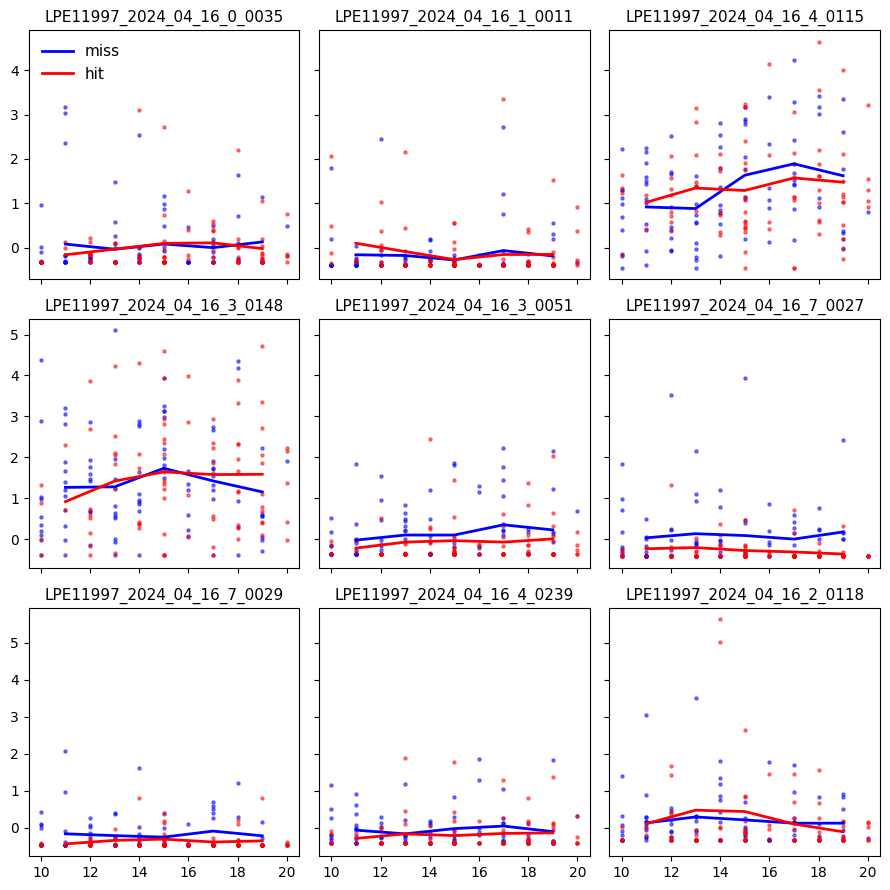

In [ ]:
# example_cell_ids = np.random.choice(sessions[0].celldata['cell_id'],size=8,replace=False)
# example_cell_ids = ['LPE12385_2024_06_15_0_0126',
# 'LPE12385_2024_06_15_0_0075']
ises = 3
example_cell_ids = get_example_cells(sessions[ises].sessiondata['session_id'][0])

# get some responsive cells: 
idx                 = np.nanmean(sessions[ises].respmat,axis=1)>.5
idx                 = sessions[ises].celldata['sig_N']==1
example_cell_ids = np.random.choice(sessions[ises].celldata['cell_id'][idx], size=9, replace=False)
# example_cell_ids    = (sessions[ises].celldata['cell_id'][idx]).to_numpy()

fig = plot_noise_activity_example_neurons(sessions[ises],example_cell_ids)
# fig.savefig(os.path.join(savedir,'ExampleNeuronActivity_' + sessions[ises].sessiondata['session_id'][0] + '.png'), format = 'png',bbox_inches='tight')

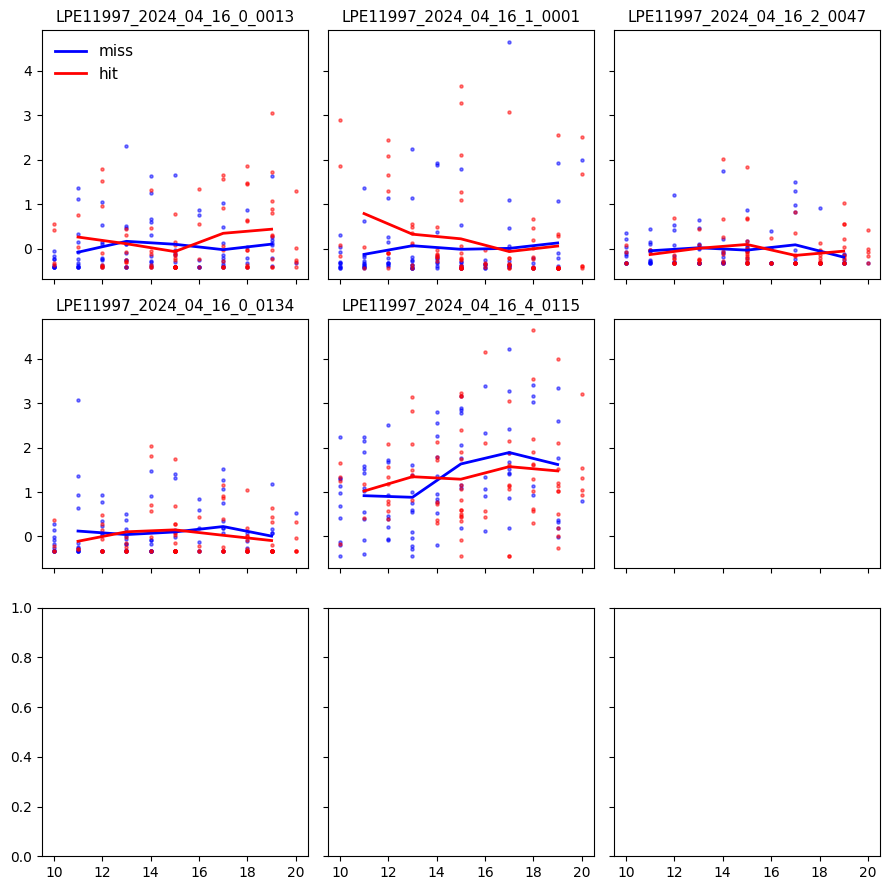

In [ ]:
# example_cell_ids = np.random.choice(sessions[0].celldata['cell_id'],size=8,replace=False)
# example_cell_ids = ['LPE12385_2024_06_15_0_0126',
# 'LPE12385_2024_06_15_0_0075']
ises = 3
example_cell_ids = get_example_cells(sessions[ises].sessiondata['session_id'][0])

# get some responsive cells: 
# idx                 = np.nanmean(sessions[ises].respmat,axis=1)>.5
# idx                 = sessions[ises].celldata['sig_N']==1
# 
# example_cell_ids = np.random.choice(sessions[ises].celldata['cell_id'][idx], size=9, replace=False)
# example_cell_ids    = (sessions[ises].celldata['cell_id'][idx]).to_numpy()

fig = plot_noise_activity_example_neurons(sessions[ises],example_cell_ids)
# fig.savefig(os.path.join(savedir,'ExampleNeuronActivity_' + sessions[ises].sessiondata['session_id'][0] + '.png'), format = 'png',bbox_inches='tight')

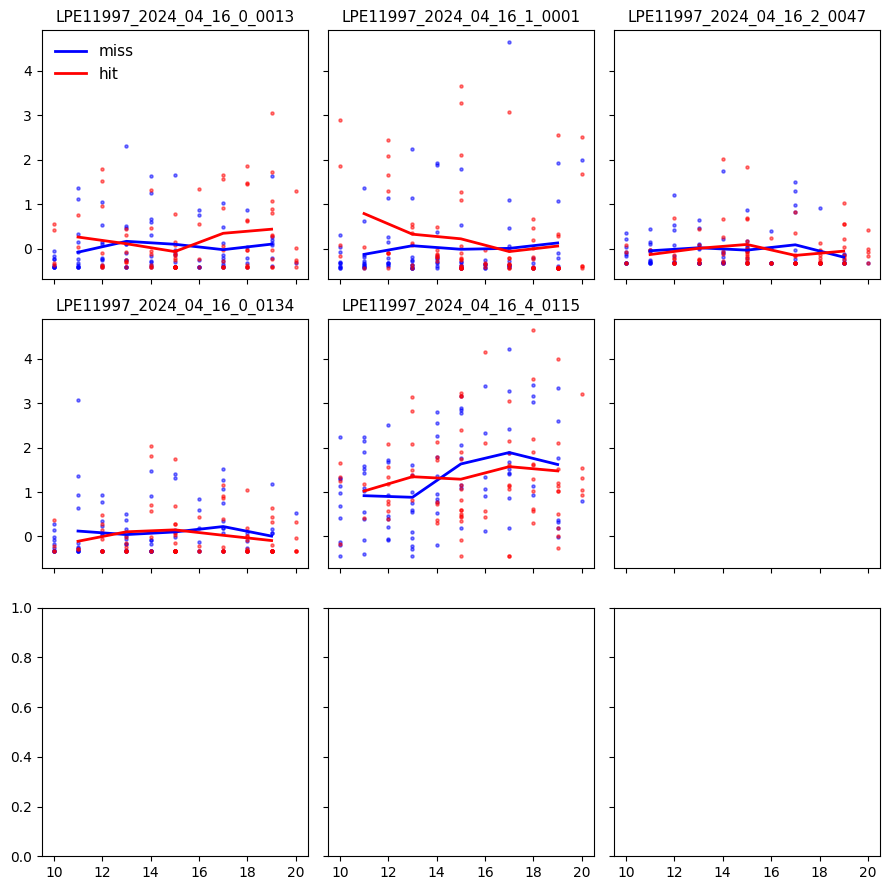

In [ ]:
# example_cell_ids = np.random.choice(sessions[0].celldata['cell_id'],size=8,replace=False)
# example_cell_ids = ['LPE12385_2024_06_15_0_0126',
# 'LPE12385_2024_06_15_0_0075']
ises = 3
example_cell_ids = get_example_cells(sessions[ises].sessiondata['session_id'][0])

# get some responsive cells: 
# idx                 = np.nanmean(sessions[ises].respmat,axis=1)>.5
# idx                 = sessions[ises].celldata['sig_N']==1
# example_cell_ids = np.random.choice(sessions[ises].celldata['cell_id'][idx], size=9, replace=False)
# example_cell_ids    = (sessions[ises].celldata['cell_id'][idx]).to_numpy()

fig = plot_noise_activity_example_neurons(sessions[ises],example_cell_ids)
# fig.savefig(os.path.join(savedir,'ExampleNeuronActivity_' + sessions[ises].sessiondata['session_id'][0] + '.png'), format = 'png',bbox_inches='tight')

IndexError: index 0 is out of bounds for axis 0 with size 0

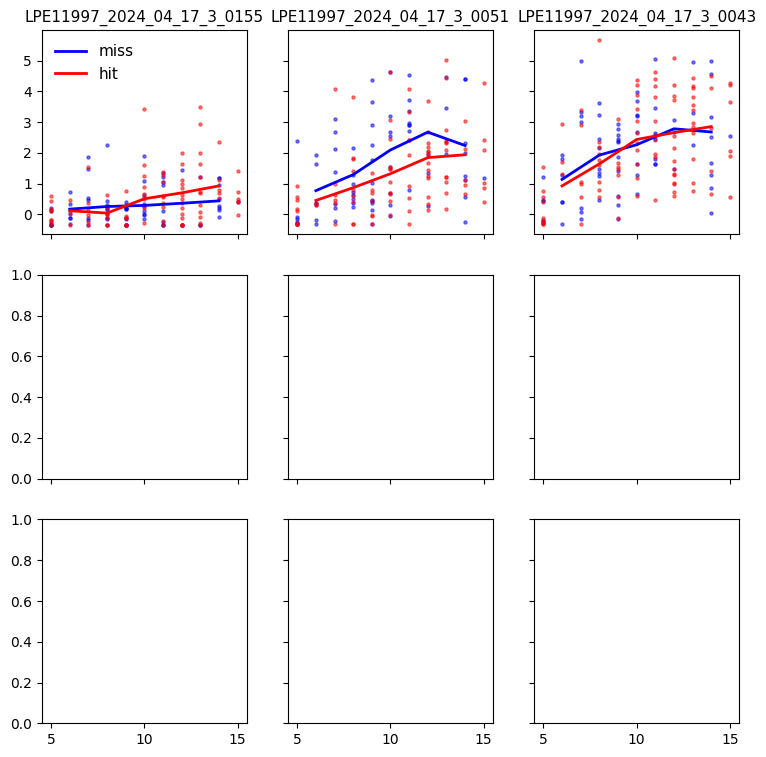

In [ ]:
# example_cell_ids = np.random.choice(sessions[0].celldata['cell_id'],size=8,replace=False)
# example_cell_ids = ['LPE12385_2024_06_15_0_0126',
# 'LPE12385_2024_06_15_0_0075']
ises = 4
example_cell_ids = get_example_cells(sessions[ises].sessiondata['session_id'][0])

# get some responsive cells: 
# idx                 = np.nanmean(sessions[ises].respmat,axis=1)>.5
# idx                 = sessions[ises].celldata['sig_N']==1
# example_cell_ids = np.random.choice(sessions[ises].celldata['cell_id'][idx], size=9, replace=False)
# example_cell_ids    = (sessions[ises].celldata['cell_id'][idx]).to_numpy()

fig = plot_noise_activity_example_neurons(sessions[ises],example_cell_ids)
# fig.savefig(os.path.join(savedir,'ExampleNeuronActivity_' + sessions[ises].sessiondata['session_id'][0] + '.png'), format = 'png',bbox_inches='tight')

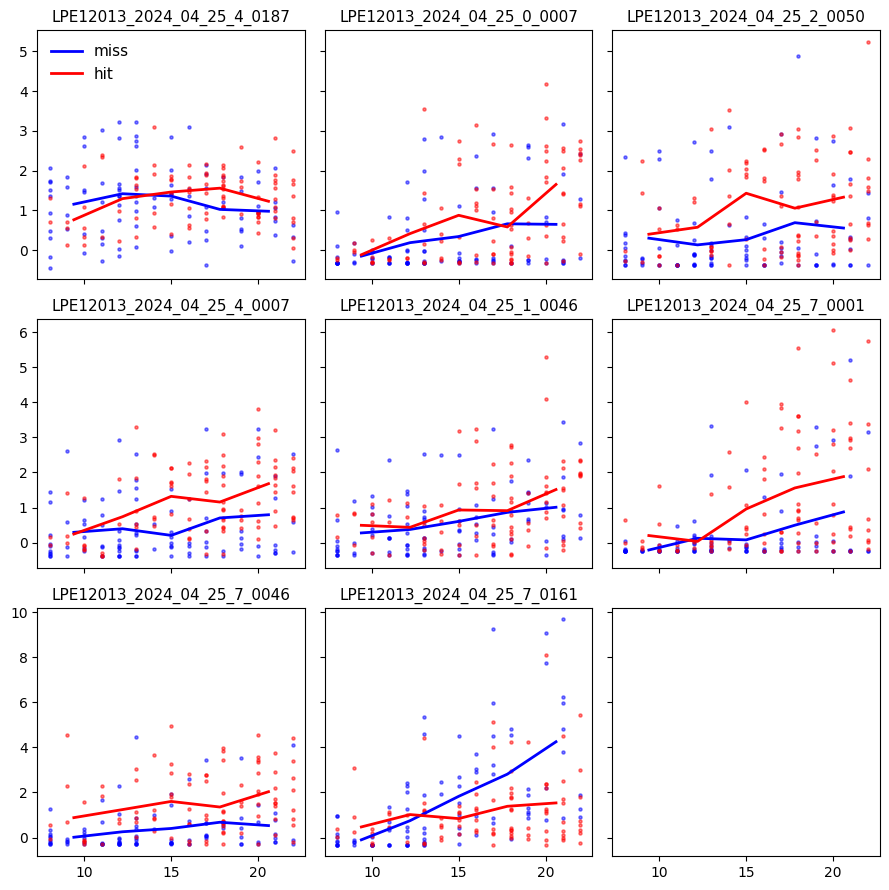

In [ ]:
# example_cell_ids = np.random.choice(sessions[0].celldata['cell_id'],size=8,replace=False)
# example_cell_ids = ['LPE12385_2024_06_15_0_0126',
# 'LPE12385_2024_06_15_0_0075']
ises = 5
example_cell_ids = get_example_cells(sessions[ises].sessiondata['session_id'][0])

# get some responsive cells: 
# idx                 = np.nanmean(sessions[ises].respmat,axis=1)>.5
# idx                 = sessions[ises].celldata['sig_N']==1
# example_cell_ids = np.random.choice(sessions[ises].celldata['cell_id'][idx], size=9, replace=False)
# example_cell_ids    = (sessions[ises].celldata['cell_id'][idx]).to_numpy()

fig = plot_noise_activity_example_neurons(sessions[ises],example_cell_ids)
# fig.savefig(os.path.join(savedir,'ExampleNeuronActivity_' + sessions[ises].sessiondata['session_id'][0] + '.png'), format = 'png',bbox_inches='tight')

In [ ]:
celldata = pd.concat([ses.celldata for ses in sessions]).reset_index(drop=True)

N = len(celldata)

labeled     = ['unl','lab']
nlabels     = len(labeled)
areas       = ['V1','PM','AL','RSP']
nareas      = len(areas)

lickresp    = [0,1]
D           = len(lickresp)

sigtype     = 'signal_psy'
zmin        = -2
zmax        = 2
nbins_noise = 5
Z           = nbins_noise + 2

sigtype     = 'signal'
zmin        = 5
zmax        = 20
nbins_noise = 5
Z           = nbins_noise + 2

edges       = np.linspace(zmin,zmax,nbins_noise+1)
centers     = np.stack((edges[:-1],edges[1:]),axis=1).mean(axis=1)
plotcenters = np.hstack((centers[0]-2*np.mean(np.diff(centers)),centers,centers[-1]+2*np.mean(np.diff(centers))))

S           = len(sbins)

data_sig_spatial = np.full((N,Z,S),np.nan)
data_sig_mean    = np.full((N,Z),np.nan)

data_sig_hit_spatial = np.full((N,Z,D,S),np.nan)
data_sig_hit_mean    = np.full((N,Z,D),np.nan)

min_ntrials = 5
for ises,ses in enumerate(sessions):
    print(f"\rComputing mean activity for noise trial bins for session {ises+1} / {len(sessions)}",end='\r')
    idx_N_ses = celldata['session_id']==ses.sessiondata['session_id'][0]

    #Catch trials
    idx_T           = sessions[ises].trialdata['signal']==0
    data_sig_spatial[idx_N_ses,0,:]   = np.nanmean(sessions[ises].stensor[:,idx_T,:],axis=1)
    data_sig_mean[idx_N_ses,0]        = np.nanmean(sessions[ises].respmat[:,idx_T],axis=1)
    #Max trials
    idx_T           = sessions[ises].trialdata['signal']==100
    data_sig_spatial[idx_N_ses,-1,:]   = np.nanmean(sessions[ises].stensor[:,idx_T,:],axis=1)
    data_sig_mean[idx_N_ses,-1]        = np.nanmean(sessions[ises].respmat[:,idx_T],axis=1)

    for ibin,(low,high) in enumerate(zip(edges[:-1],edges[1:])):
        idx_T           = np.all((sessions[ises].trialdata[sigtype]>=low,
                                sessions[ises].trialdata[sigtype]<=high), axis=0)
        if np.sum(idx_T)>=min_ntrials:
            data_sig_spatial[idx_N_ses,ibin+1,:]   = np.nanmean(sessions[ises].stensor[:,idx_T,:],axis=1)
            data_sig_mean[idx_N_ses,ibin+1]        = np.nanmean(sessions[ises].respmat[:,idx_T],axis=1)

    for ilr,lr in enumerate(lickresp):
        #Catch trials
        idx_T           = np.all((sessions[ises].trialdata['signal']==0, 
                                    sessions[ises].trialdata['lickResponse']==lr,
                                    sessions[ises].trialdata['engaged']==1), axis=0)
        data_sig_hit_spatial[idx_N_ses,0,ilr,:]   = np.nanmean(sessions[ises].stensor[:,idx_T,:],axis=1)
        data_sig_hit_mean[idx_N_ses,0,ilr]        = np.nanmean(sessions[ises].respmat[:,idx_T],axis=1)
        #Max trials
        idx_T           = np.all((sessions[ises].trialdata['signal']==100,
                                    sessions[ises].trialdata['lickResponse']==lr,
                                    sessions[ises].trialdata['engaged']==1), axis=0)
        data_sig_hit_spatial[idx_N_ses,-1,ilr,:]   = np.nanmean(sessions[ises].stensor[:,idx_T,:],axis=1)
        data_sig_hit_mean[idx_N_ses,-1,ilr]        = np.nanmean(sessions[ises].respmat[:,idx_T],axis=1)

        for ibin,(low,high) in enumerate(zip(edges[:-1],edges[1:])):
            idx_T           = np.all((sessions[ises].trialdata[sigtype]>=low,
                                    sessions[ises].trialdata[sigtype]<=high,
                                    sessions[ises].trialdata['lickResponse']==lr,
                                    sessions[ises].trialdata['engaged']==1), axis=0)
            if np.sum(idx_T)>=min_ntrials:
                data_sig_hit_spatial[idx_N_ses,ibin+1,ilr,:]   = np.nanmean(sessions[ises].stensor[:,idx_T,:],axis=1)
                data_sig_hit_mean[idx_N_ses,ibin+1,ilr]        = np.nanmean(sessions[ises].respmat[:,idx_T],axis=1)

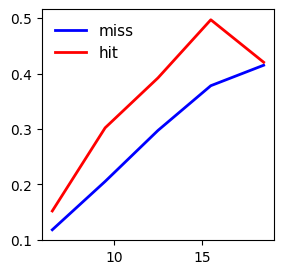

In [ ]:
# plt.plot(plotcenters,np.nanmean(data_sig_mean,axis=0),color='k')

 # plotcolors = [sns. sns.color_palette("inferno",C)
plotcolors = ['blue']  # Start with black
plotcolors.append('red')  # Add orange at the end
plotlabels = ['miss','hit']
markerstyles = ['o','o']

fig,axes = plt.subplots(1,1,figsize=(3,3))
ax = axes
idx_N = celldata['roi_name']=='V1'
# idx_N = celldata['roi_name']=='V1'
idx_N = celldata['sig_N']==1

idx_N = np.all((celldata['roi_name']=='V1',
                celldata['sig_N']==1), axis=0)

for ilr,lr in enumerate(lickresp):
    # plt.plot(plotcenters,np.nanmean(data_sig_hit_mean[idx_N,:,ilr],axis=0),color=plotcolors[ilr], label=plotlabels[ilr],linewidth=2)
    plt.plot(plotcenters[1:-1],np.nanmean(data_sig_hit_mean[idx_N,1:-1,ilr],axis=0),color=plotcolors[ilr], label=plotlabels[ilr],linewidth=2)
ax.legend(plotlabels,loc='upper left',fontsize=11,frameon=False)
    # plt.plot(plotcenters,np.nanmean(data_sig_hit_mean[:,0],axis=0),color='k')
# plt.plot(plotcenters,np.nanmean(data_sig_hit_mean,axis=0))

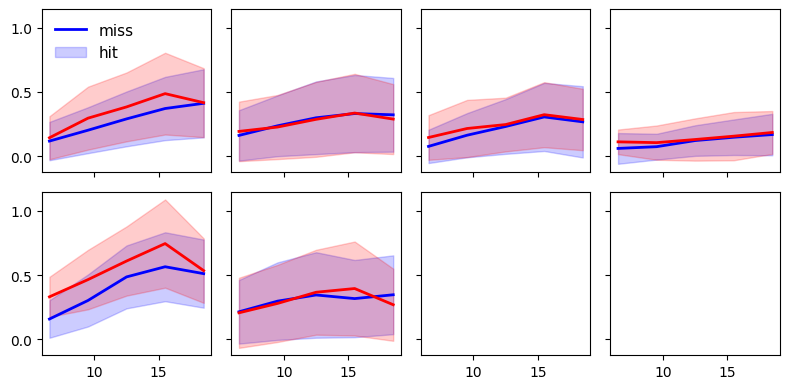

In [ ]:
labeled     = ['unl','lab']
nlabels     = len(labeled)
areas       = ['V1','PM','AL','RSP']
nareas      = len(areas)

data = copy.deepcopy(data_sig_hit_mean)
#normalize data:
# data = data - np.nanmin(data,axis=1,keepdims=True)
# data = data / np.nanmax(data,axis=1,keepdims=True)

fig,axes    = plt.subplots(nlabels,nareas,figsize=(nareas*2,nlabels*2),sharey=True,sharex=True)
for ilab,label in enumerate(labeled):
    for iarea, area in enumerate(areas):
        ax = axes[ilab,iarea]
        idx_N = np.all((ses.celldata['roi_name']==area, ses.celldata['labeled']==label), axis=0)
        idx_N = np.all((celldata['roi_name']==area, celldata['labeled']==label), axis=0)

        idx_N = np.all((celldata['roi_name']==area, 
                        celldata['sig_N']==1,
                        celldata['labeled']==label), axis=0)

        if np.sum(idx_N) > 5:
            for ilr,lr in enumerate(lickresp):
                # plt.plot(plotcenters,np.nanmean(data_sig_hit_mean[idx_N,:,ilr],axis=0),color=plotcolors[ilr], label=plotlabels[ilr],linewidth=2)
                # ax.plot(plotcenters[1:-1],np.nanmean(data[idx_N,1:-1,ilr],axis=0),color=plotcolors[ilr], label=plotlabels[ilr],linewidth=2)
                shaded_error(plotcenters[1:-1],data[idx_N,1:-1,ilr],color=plotcolors[ilr], label=plotlabels[ilr],ax=ax,error='sem')
        
        if ilab==0 and iarea==0:
            ax.legend(plotlabels,loc='upper left',fontsize=11,frameon=False)

        # ax.axhline(0,color='k',linestyle='--',linewidth=1)
        # ax.set_xlim([-80,60])
        # if ilab == 0:
        #     ax.set_title(area)
        # if ilab == 1 and iarea == 1:
        #     ax.set_xlabel('Position relative to stim (cm)')
        # if iarea==0:
        #     ax.set_ylabel('cvR2')
        # # if iarea==0 and ilab == 0:
        #     ax.legend(frameon=False,fontsize=6)
plt.tight_layout()
# plt.savefig(os.path.join(savedir, 'EncodingModel_cvR2_Areas_Labels_%s.png') % ses.sessiondata['session_id'][0], format='png')
# plt.savefig(os.path.join(savedir, 'EncodingModel_%s_cvR2_Areas_Labels_%dsessions.png') % (version,nSessions), format='png')

In [ ]:
label = 'unl'

In [ ]:
area = 'V1'

In [ ]:
idx_N = np.all((celldata['roi_name']==area, 
                celldata['sig_N']==1,
                celldata['labeled']==label), axis=0)

In [ ]:
np.sum(idx_N)

717

In [ ]:
data[idx_N,1:-1,ilr]

array([[-0.1667355 , -0.16364073, -0.07878558,  0.06017358,         nan],
       [-0.14217454,  0.01702663, -0.2268948 , -0.22967525,         nan],
       [-0.20331473, -0.0682055 , -0.11467443, -0.17671888,         nan],
       ...,
       [        nan,  0.36288879, -0.00876771,  0.24737222,  0.39348317],
       [        nan, -0.20083095, -0.20989988, -0.20726895, -0.11155233],
       [        nan,  0.14397793,  0.31678131,  0.04300955,  0.0407869 ]])

In [ ]:
np.shape(data[idx_N,1:-1,ilr])

(717, 5)

In [ ]:
y = data[idx_N,1:-1,ilr]

In [ ]:
x = plotcenters[1:-1]

In [ ]:
x = np.array(x)
y = np.array(y)

# if np.ndim(y)==1:
#     y = y[np.newaxis,:]
if ax is None:
    ax = plt.gca()
    
if yerror is None:
    if center=='mean':
        ycenter = np.nanmean(y,axis=0)
    elif center=='median':
        ycenter = np.nanmedian(y,axis=0)
    else:
        print('Unknown error type')

NameError: name 'yerror' is not defined

In [ ]:
yerror=None

In [ ]:
x = np.array(x)
y = np.array(y)

# if np.ndim(y)==1:
#     y = y[np.newaxis,:]
if ax is None:
    ax = plt.gca()

In [ ]:
center=='mean'

NameError: name 'center' is not defined

In [ ]:
center='mean'

In [ ]:
error

NameError: name 'error' is not defined